<a href="https://colab.research.google.com/github/Ankit-Anand-3399/Regression/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Ankit Anand
##### **Team Member 2 -** Raksha

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Ankit-Anand-3399/Regression

# **Problem Statement**


**Write your problem Statement here**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
Data Description
Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores
Data fields
Most of the fields are self-explanatory.
Id - an Id that represents a (Store, Da,,te) duple within the set
Store - a unique Id for each store
Sales - the turnover for any given day (Dependent Variable)
Customers - the number of customers on a given day

# **Data Description**

**Rossmann Stores Data.csv - historical data including Sales**

**store.csv - supplemental information about the store**

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [41]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast 
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [42]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Rosmann Data
database = "/content/drive/MyDrive/EDA datasets/Regression/Rossmann Stores Data.csv"
sales_df =pd.read_csv(database)
# Store data
database = "/content/drive/MyDrive/EDA datasets/Regression/store.csv"
store_df =pd.read_csv(database)

<ipython-input-43-e54b0e6f4c63>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df =pd.read_csv(database)


### Dataset First View

In [44]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [45]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [46]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [47]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [48]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [49]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [50]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [51]:
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [52]:
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [53]:
sales_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

Missing Values /Null Values

In [54]:
# CompetitionDistance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'] .unique()

array([1, 0])

In [55]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

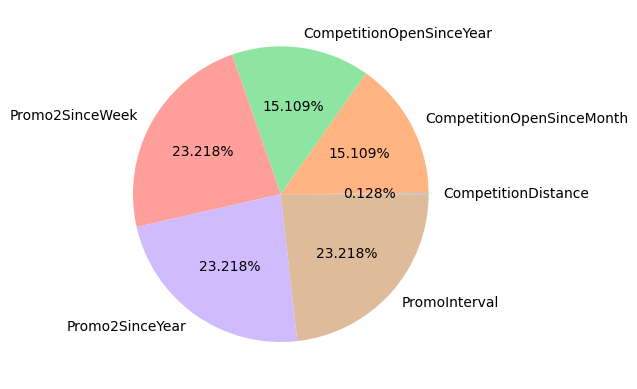

In [56]:
# Visualizing the missing values
missing_values=store_df.isnull().sum()
missing_values=missing_values[missing_values>0]
label=missing_values.index
count=missing_values.values
colors = sns.color_palette('pastel')
plt.pie(count, labels=label,colors = colors, autopct='%.3f%%')
plt.show()

In [57]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(sales_df[i].unique())
  print("-----------------------")

DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [58]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [59]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [60]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [61]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [62]:
final1 = pd.merge(sales_df, store_df, on='Store', how='left')

In [63]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [64]:
#Change data types object to int 
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

In [65]:
# change Data Types object into int 
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

In [66]:
# change Data Types object into int 
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

In [67]:
print(final1[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [68]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [69]:
final1["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [70]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [71]:
# code for change object into date format
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [72]:
# code for change float into integer 
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)


In [73]:
# code for change float into integer 
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

In [74]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

## ***2. Understanding Your Variables***

In [75]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [76]:
final1.describe().apply(lambda x: round(x, 2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


### Variables Description 

Answer Here

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

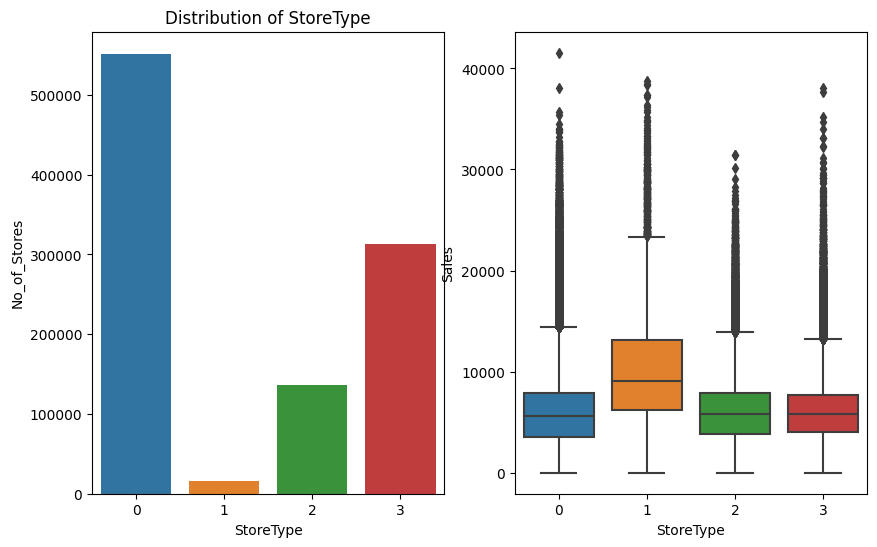

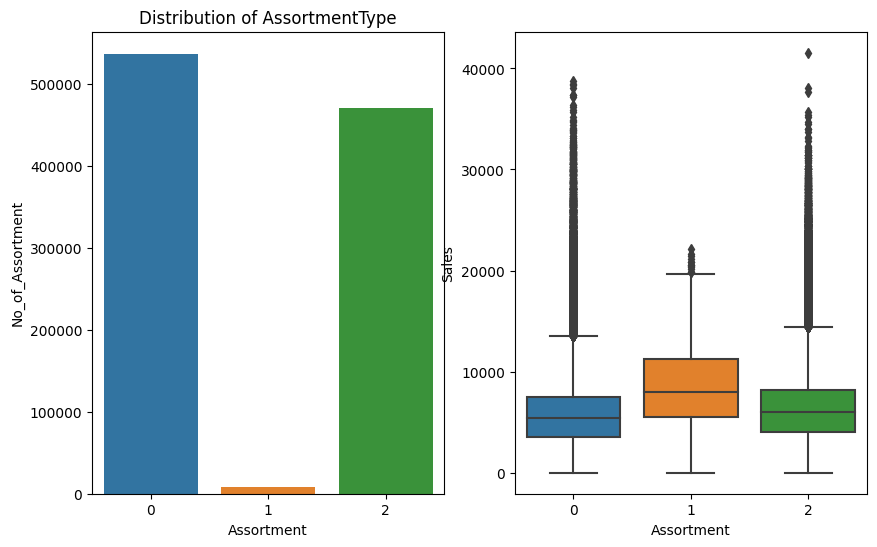

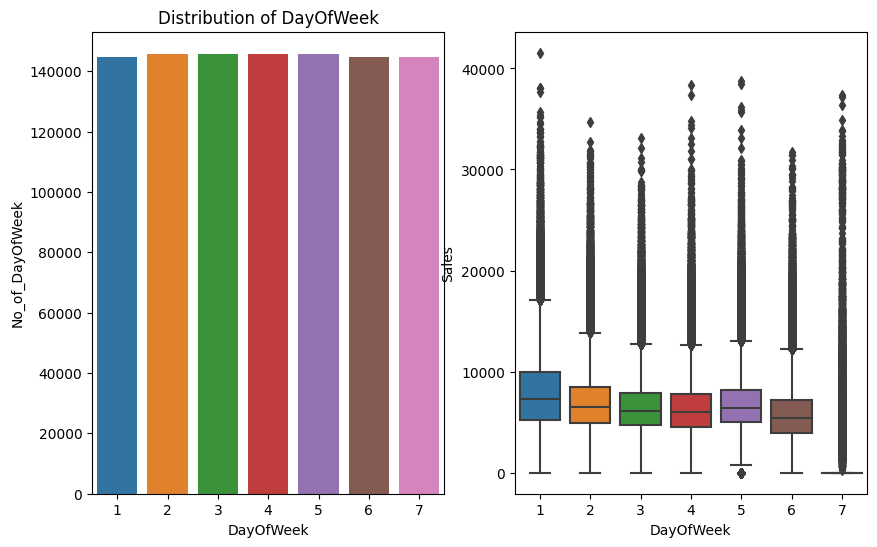

In [77]:
# Chart - 1 visualization code

plt.figure(figsize=(10,6))
  
plt.subplot(1,2,1)
Store_distribution=final1.groupby('StoreType')['StoreType'].count().reset_index(name='No_of_Stores')
sns.barplot(x = 'StoreType', y = 'No_of_Stores', data = Store_distribution)
plt.title("Distribution of StoreType")

plt.subplot(1,2,2)
data=final1[["StoreType","Sales"]].sort_values(by="StoreType")
sns.boxplot(x="StoreType", y="Sales", data=data)


plt.show()


plt.figure(figsize=(10,6))
  
plt.subplot(1,2,1)
Assortment_distribution=final1.groupby('Assortment')['Assortment'].count().reset_index(name='No_of_Assortment')
sns.barplot(x = 'Assortment', y = 'No_of_Assortment', data = Assortment_distribution)
plt.title("Distribution of AssortmentType")

plt.subplot(1,2,2)
data=final1[["Assortment","Sales"]].sort_values(by="Assortment")
sns.boxplot(x="Assortment", y="Sales", data=data)


plt.show()


plt.figure(figsize=(10,6))
  
plt.subplot(1,2,1)
Assortment_distribution=final1.groupby('DayOfWeek')['DayOfWeek'].count().reset_index(name='No_of_DayOfWeek')
sns.barplot(x = 'DayOfWeek', y = 'No_of_DayOfWeek', data = Assortment_distribution)
plt.title("Distribution of DayOfWeek")

plt.subplot(1,2,2)
data=final1[["DayOfWeek","Sales"]].sort_values(by="DayOfWeek")
sns.boxplot(x="DayOfWeek", y="Sales", data=data)


plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0.5, 1.0, 'Open VS DayOfweek')

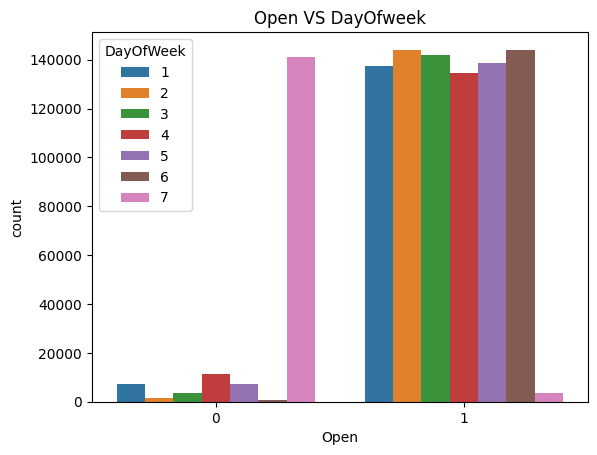

In [78]:
# Chart - 2 visualization code

sns.countplot(x=final1["Open"], hue=final1["DayOfWeek"])
plt.title("Open VS DayOfweek")


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if Promo leads to a change in the average of sales.

**Null Hypothesis:** The average sales is equal between the two groups

**Alternate Hypothesis**:The average sales is not equal between the two groups

#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value
no_promo=final1.loc[final1['Promo']==0]
no_promo=no_promo.sample(n=29)
with_promo=final1.loc[final1['Promo']==1]
with_promo=with_promo.sample(n=29)

group1=no_promo['Sales']
group2=with_promo['Sales']

import scipy.stats as stats

#perform the Mann-Whitney U test
stats.mannwhitneyu(group1, group2, alternative='two-sided')

MannwhitneyuResult(statistic=262.5, pvalue=0.014063208723644421)

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U Test:

The p value is less than 0.05 . Hence we reject the null hypothesis. The promo has effect on sales average.

##### Why did you choose the specific statistical test?

A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed and the sample sizes are small (n <30).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if Customers and sales have positive correlation

**Null Hypothesis:** The customers have no correlation with sales

**Alternate Hypothesis:**The customers have correlation with sales

#### 2. Perform an appropriate statistical test.

In [92]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
spearmanr(final1['Customers'], final1['Sales'])



SignificanceResult(statistic=0.9033527549358042, pvalue=0.0)

##### Which statistical test have you done to obtain P-Value?

Spearman Rank Correlation, which is used to measure the correlation between two ranked variables.

The correlation is positive and the p value supports it by rejecting the null hypothesis since it is less than 0.05

##### Why did you choose the specific statistical test?

Since sales and customers are not normally distributed the non parametric correlation is chosen

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To know if StoreType,Assortment and pairs odf StoreType and Assortment hav impact on sales.

**Null Hypothesis:** The  sales is not affected by Storetype.
The sales is not affected by Assortment

**Alternate Hypothesis:**The  sales is affected by Storetype.
The sales is affected by Assortment 

#### 2. Perform an appropriate statistical test.

In [93]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Sales ~ C(StoreType) + C(Assortment) + C(StoreType):C(Assortment)', data=final1).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(StoreType),8.877651e+10,3.0,2065.756237,0.0
C(Assortment),7.103380e+10,2.0,2479.347132,0.0
C(StoreType):C(Assortment),1.350265e+11,6.0,1570.977652,0.0
Residual,1.457149e+13,1017200.0,NaN,NaN


##### Which statistical test have you done to obtain P-Value?

Two -Way Anova Test: The p value for StoreType ,Assortment and both taken into account as pairs have effect on sales . The p Value is less than 0.05 Hence the null hypothesis is rejected

##### Why did you choose the specific statistical test?

A two-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two factors.

The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

## ***6. Feature Engineering & Data Pre-processing***

<ipython-input-118-d5bf9bfc42bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

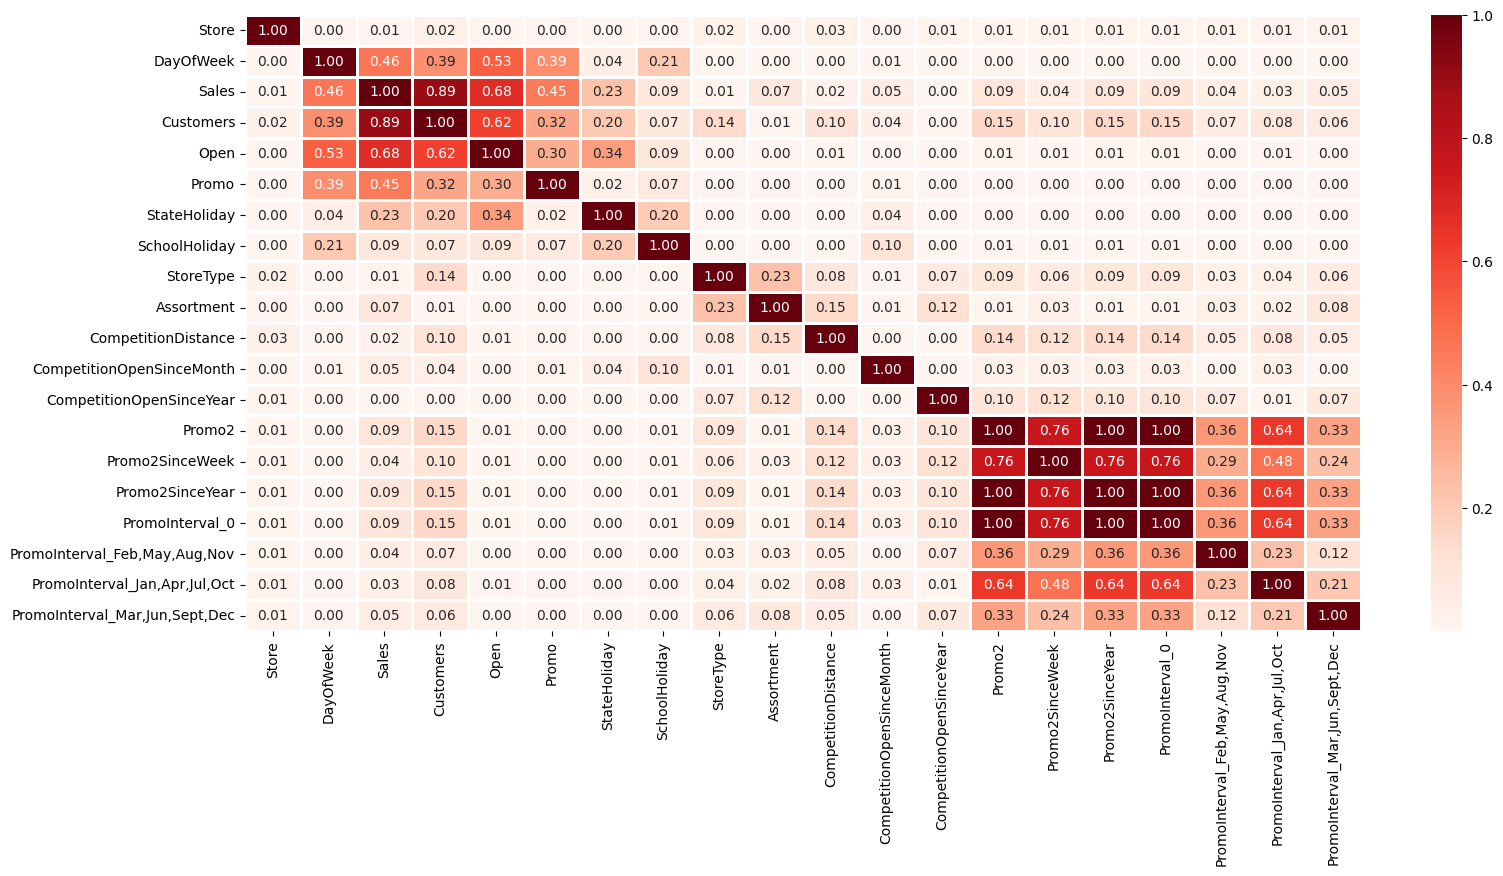

In [118]:
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

# **Multicolliearity**

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [120]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Store,1.003299e+00
1,DayOfWeek,1.668024e+00
2,Customers,1.845632e+00
3,Open,2.278144e+00
4,Promo,1.232929e+00
5,StateHoliday,1.280969e+00
6,SchoolHoliday,1.098981e+00
7,StoreType,1.105306e+00
8,Assortment,1.108785e+00
9,CompetitionDistance,1.080765e+00


**In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.**

In [121]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,1.003299
1,DayOfWeek,1.668024
2,Customers,1.845632
3,Open,2.278144
4,Promo,1.232929
5,StateHoliday,1.280969
6,SchoolHoliday,1.098981
7,StoreType,1.105306
8,Assortment,1.108785
9,CompetitionDistance,1.080765


# **VIF below 10 is apt for ML model**

### 2. Handling Outliers

In [94]:
# Handling Outliers & Outlier treatments
def plotvariable(df,variable):
  plt.figure(figsize=(8,4))
  
  plt.subplot(1,2,1)
  plt.hist(df[variable])
  plt.title("Distribution of {} ".format(variable))

  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.title("Distribution of {} ".format(variable))
  
  
  plt.show()

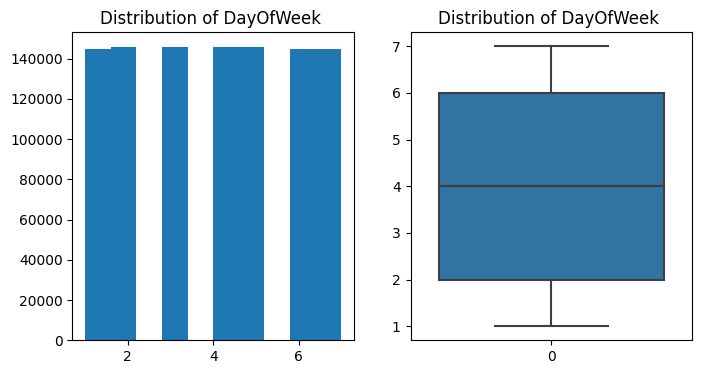

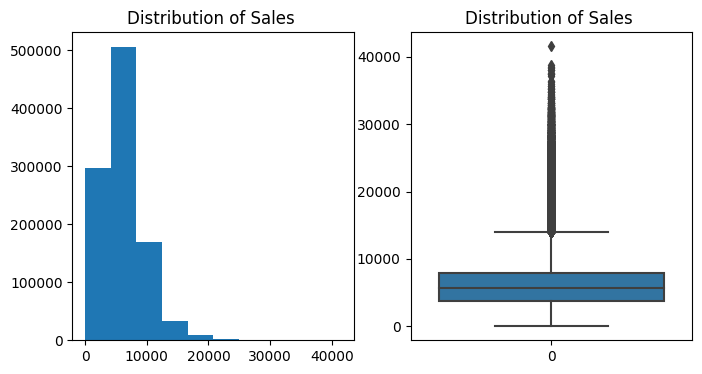

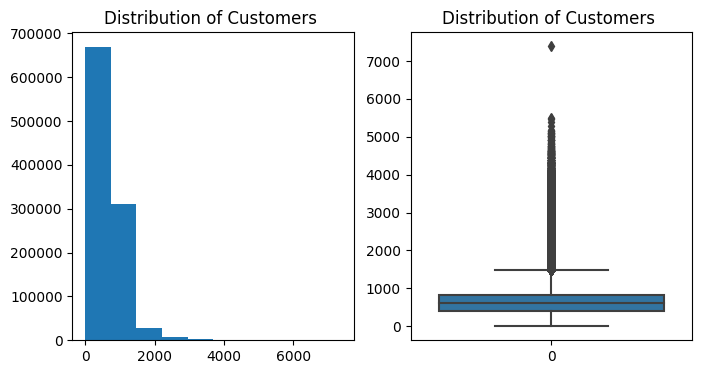

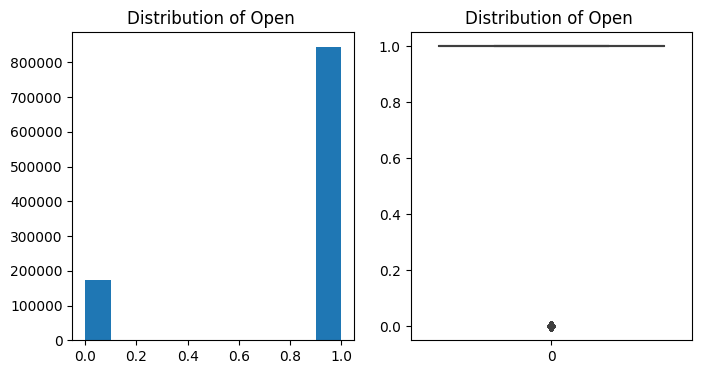

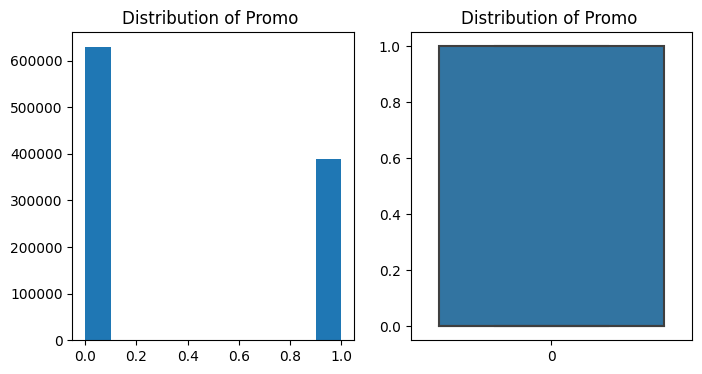

In [95]:
sales_data=sales_df.drop(columns=["Store","Date","StateHoliday","SchoolHoliday"]).columns
store_data=store_df.drop(columns=["Store"]).columns
type(sales_data.tolist())
for variable in sales_data.tolist():
  plotvariable(sales_df,variable)

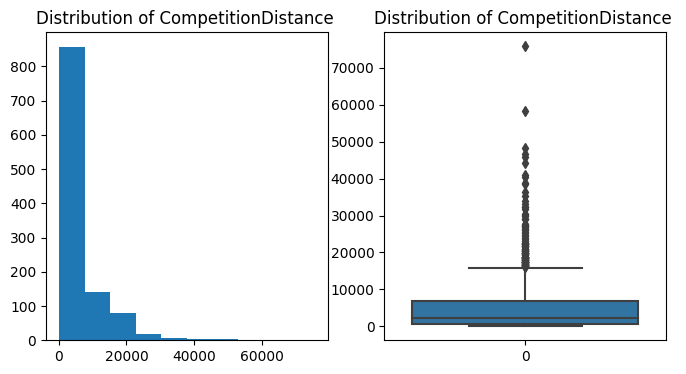

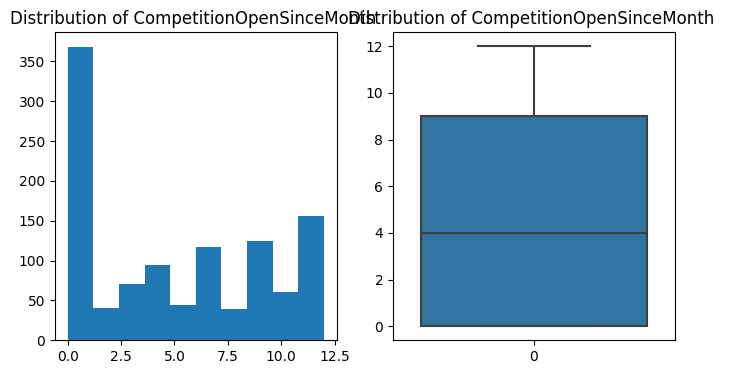

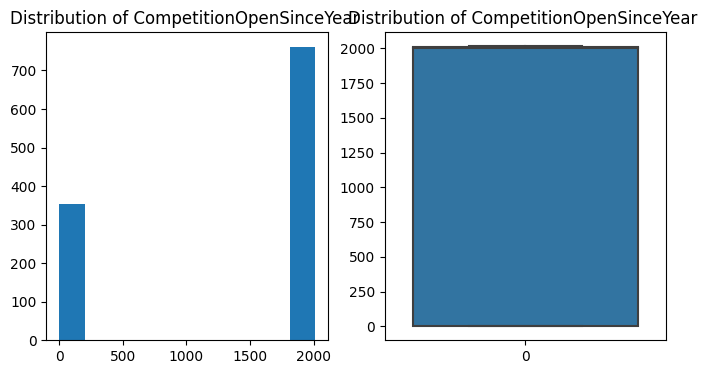

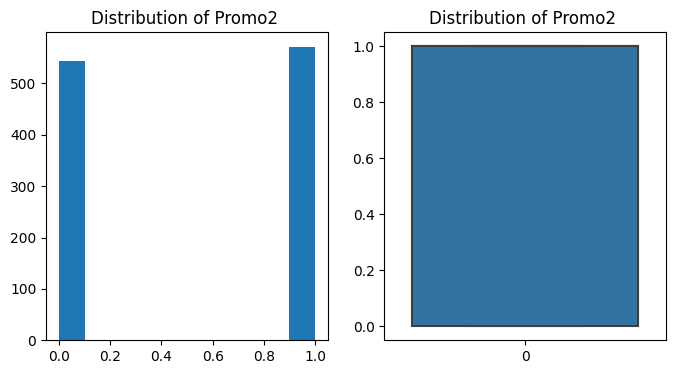

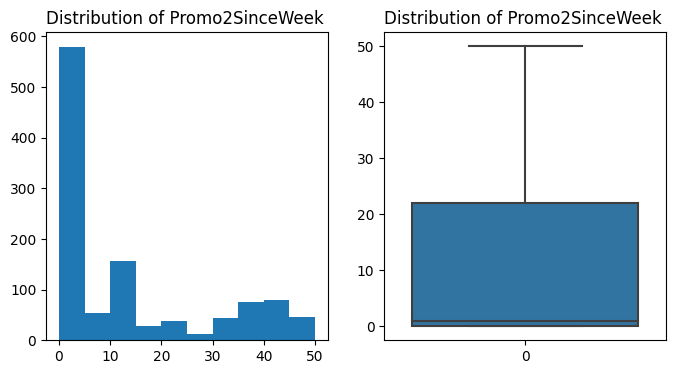

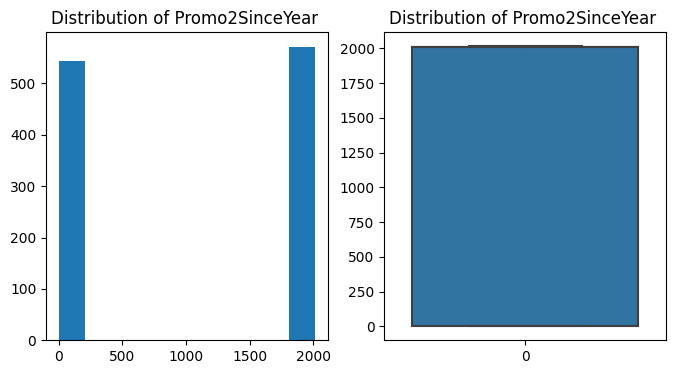

In [96]:
store_data=store_df.drop(columns=["Store","StoreType","Assortment","PromoInterval"]).columns
type(store_data.tolist())
for variable in store_data.tolist():
  plotvariable(store_df,variable)

**The columns that have ouliers are:**




1.   Sales
2.  Customers
3. CompetitionDistance
4. CompetitionOpenSinceYear


# **Hyperparameter Tuning** 

# **LASSO**

# **RIDGE**

## ***ML Model Implementation***

In [98]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])

In [100]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


**We define dependent and independent variables and convert them into arrays**

In [101]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [102]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [103]:
# Create the data of independent variables
U = final1[indep_var].values
# Create the dependent variable data
V = final1[dep_var].values

In [104]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [105]:
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]])

In [106]:
final1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [107]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


# **LINEAR REGRESSION**

In [108]:
# scaling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [109]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [110]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [111]:
linear_regression.score(U_train, v_train)

0.8677978490444807

In [112]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [113]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1944268.5102740775
RMSE : 1394.370291663616
R2 : 0.8684236859866605


# ****DECISION TREE****

In [114]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
R2 : 0.8687939610732938


In [115]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe


,actual,pred
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

MSE: 1120863.2459191852
RMSE: 1058.7082912300184
RMPSE: 0.18321113258629942
R2: 0.9241467659267474


In [117]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)


MSE : 2297465.6128952196
RMSE : 1515.739295820762
RMPSE : 0.2623010657357246
R2 : 0.8445214458189534


# **Conclusion**

We saw that Sales column contains 172817 rows with 0 sale. So we created a new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around 74%.

We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about 98% which is far better than previous model.

So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has 172817 rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from Random Forest model,Graident boosting technique like adaboost ,Xgboost,we tried taking an optimum parameter so that our model doesnt overfit.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***